In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from RL import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

#cargar los datos
df = pd.read_csv("../Dataset/dataset_phishing.csv")


In [2]:
#--------exploracion de datos-----------
# #mostrar las primeras filas del df
# print("mostrar las primeras filas del df")
# print(df.head())

#mostrar las columans
print("mostrar las columas")
print(list(df.columns))

# Para saber si el dataset esta balanceado
print("- - - - - - - BALANCEO - - - - - - -")
print(df["status"].value_counts())

# Obtener tipos de datos
tipos_de_datos = df.dtypes.value_counts()

# Mostrar tipos de datos con nombres de columnas
print("- - - - - - - TIPOS DE DATOS - - - - - - -")
print(tipos_de_datos)

#verificar los valores nulos
print("verificar los valores nulos")
print(df.isnull().sum())

# informacion general del dataframe
print("informacion general del dataframe")
print(df.info())


mostrar las columas
['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks

In [3]:
#--eliminar los valores nulos o llenarlos con la media--
#eliminar filas con valores nulos
df = df.dropna()

#calcular la media solo de las columnas numericas
mean_values = df.select_dtypes(include=[np.number]).mean()

#llenar los valores nulos en las columnas numéricas
df.fillna(mean_values, inplace=True)
          
#eliminar duplicados
df = df.drop_duplicates()


In [4]:
#--convertir los tipos de datos----
# Convirtiendo Columna status a numerica
df["status"] = df["status"].map({"phishing": 1, "legitimate": 0})

# Columna innecesaria porque ya se tiene su longitud
dfProcessed = df.drop('url', axis=1)

print(list(dfProcessed.columns))
nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))


['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

In [5]:
#normalizacion de datos 
#nombre de las columnas numericas a normalizar
numeric_columns = dfProcessed.select_dtypes(include=[np.number]).columns
print(numeric_columns)

#normalizar las columnas
scaler = StandardScaler()

dfProcessed[numeric_columns] = scaler.fit_transform(dfProcessed[numeric_columns])

print(dfProcessed.head())

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [6]:
#---Crear conjuntos de entrenamiento y prueba
X = dfProcessed.drop('status', axis=1)
y = dfProcessed['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
predicciones = model.predict(X_test)
print('predicciones:')
print(predicciones)


# Asegurarse de que y_test sea un vector 1D y tenga valores 0 y 1
y_test = y_test.to_numpy().flatten()
y_test = np.where(y_test == -1, 0, y_test)  # Convertir -1 a 0 



predicciones:
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


In [7]:
#metricas de desempeño
# Calcular la precisión del modelo
print("metricas de desempeño:")

precision = precision_score(y_test, predicciones)
print("Precision:", precision)

accuracy = accuracy_score(y_test, predicciones)
print('accuracy (Exactitud):: ', accuracy)
recall= recall_score(y_test, predicciones)
print('recall (Sensibilidad): ', recall)

f1= f1_score(y_test, predicciones)
print('f1 score: ', f1)
print('el valor de f1 al ser cercano a 1 indica un buen equilibrio entre la presicion y el recall, entonces el modelo tiene un buen rendimiento en estas metricas')

matriz_de_confusion= confusion_matrix(y_test, predicciones)
print(f"Confusion Matrix:\n {matriz_de_confusion}")

metricas de desempeño:
Precision: 0.9631236442516269
accuracy (Exactitud)::  0.8797025371828522
recall (Sensibilidad):  0.7865367581930912
f1 score:  0.8659190638712823
el valor de f1 al ser cercano a 1 indica un buen equilibrio entre la presicion y el recall, entonces el modelo tiene un buen rendimiento en estas metricas
Confusion Matrix:
 [[1123   34]
 [ 241  888]]


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


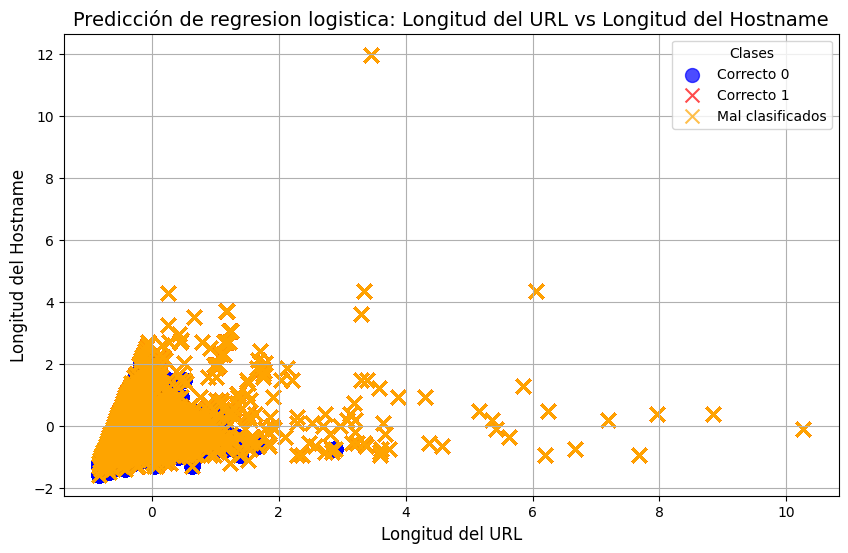

In [8]:

#---graficar los grupos encontrados 

test_y = np.array(y_test)
test_x = X_test

y_pred= np.array(predicciones)

plt.figure(figsize=(10, 6))

# Graficar puntos correctamente clasificados
for label, marker, color in zip([0, 1], ['o', 'x'], ['blue', 'red']):
    plt.scatter(
        test_x.loc[(test_y == label) & (y_pred == label), 'length_url'],
        test_x.loc[(test_y == label) & (y_pred == label), 'length_hostname'],
        label=f'Correcto {label}',
        marker=marker,
        color=color,
        s=100,
        alpha=0.7
    )

# Graficar puntos mal clasificados
plt.scatter(
    test_x.loc[test_y != y_pred, 'length_url'],
    test_x.loc[test_y != y_pred, 'length_hostname'],
    label='Mal clasificados',
    marker='x',
    color='orange',
    s=100,
    alpha=0.7
)


plt.title("Predicción de regresion logistica: Longitud del URL vs Longitud del Hostname", fontsize=14)
plt.xlabel("Longitud del URL", fontsize=12)
plt.ylabel("Longitud del Hostname", fontsize=12)
plt.legend(title="Clases", fontsize=10)
plt.grid(True)
plt.show()

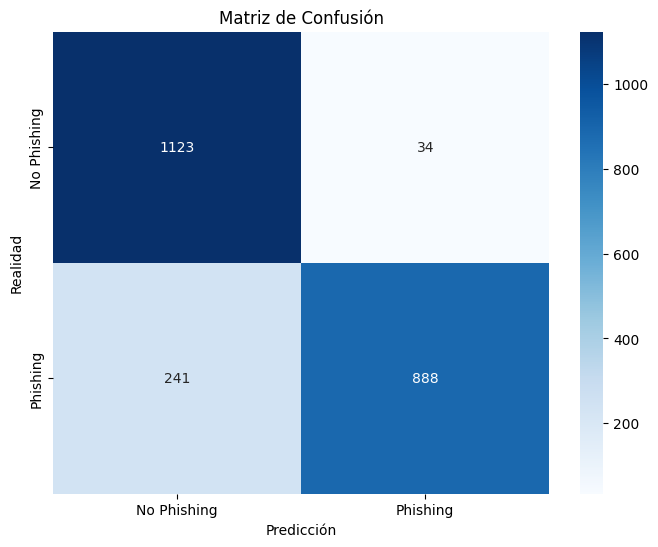

accuracy score:  0.8797025371828522


In [9]:
#Matriz de confusion
#mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_de_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Phishing', 'Phishing'], yticklabels=['No Phishing', 'Phishing'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar el puntaje de exactitud (accuracy)
score = accuracy_score(y_test, predicciones)
print("accuracy score: ", score)

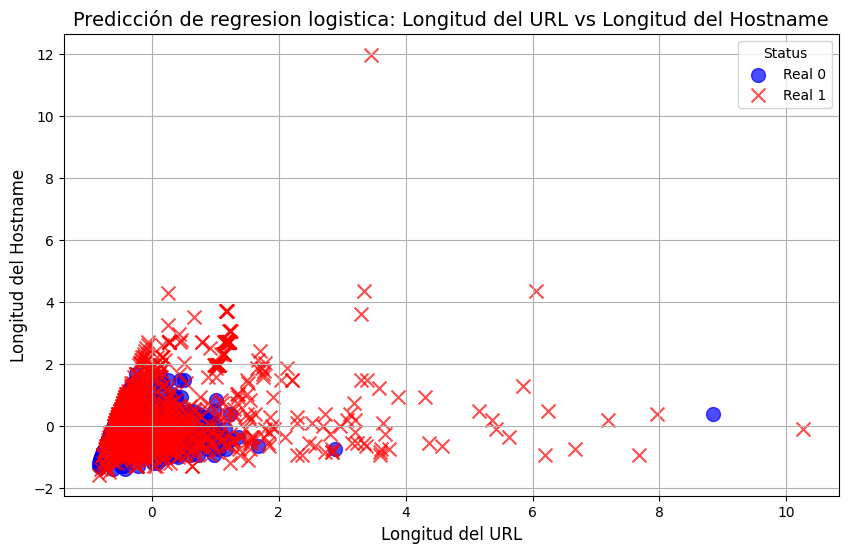

In [10]:

#prediccion Longitud del URL vs Longitud del Hostname
plt.figure(figsize=(10, 6))

for label, marker, color in zip([0, 1], ['o', 'x'], ['blue', 'red']):
    plt.scatter(
        test_x.loc[y_test == label, 'length_url'],
        test_x.loc[y_test == label, 'length_hostname'],
        label=f'Real {label}',
        marker=marker,
        color=color,
        s=100,
        alpha=0.7
    )

plt.title("Predicción de regresion logistica: Longitud del URL vs Longitud del Hostname", fontsize=14)
plt.xlabel("Longitud del URL", fontsize=12)
plt.ylabel("Longitud del Hostname", fontsize=12)
plt.legend(title="Status", fontsize=10)
plt.grid(True)
plt.show()